# Face averaging

Detect faces in images and average them all together

Uses my [`facer`](https://github.com/johnwmillr/Facer) library: https://github.com/johnwmillr/Facer

In [1]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import dlib
from facer import facer

Loading face detector and landmark prediction models...
Done, models loaded.


# Load images, detect landmarks, average the faces

https://github.com/davisking/dlib/blob/master/python_examples/face_landmark_detection.py

### Load the images

In [6]:
root = "./face_image_downloads"
folders = glob.glob(os.path.join(root, "*"))

In [10]:
%% time
for folder in folders[:1]:
    print(folder)
    images = facer.load_images(folder, verbose=True)

./face_image_downloads/RAP_MALE
Found 291 in './face_image_downloads/RAP_MALE'.
(1 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_J. Cole.jpg
(30 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_YFN Lucci.jpg
(59 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_Big K.R.I.T..jpg
(88 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_Nick Cannon.jpg
(117 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_King Syze.jpg
(146 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_Boldy James.jpeg
(175 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_Renz Julian.jpg
(204 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_Gnash (musician).jpeg
(233 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_Red Café.jpg
(262 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_Loose Logic.jpg
(291 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_Taebin.jpg


### Detect face landmarks

In [15]:
%%time
# Detect landmarks for each face
landmarks, faces = facer.detect_face_landmarks(images, verbose=True)

Starting face landmark detection...
Processing 291.
(1 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_J. Cole.jpg
(30 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_YFN Lucci.jpg
(59 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_Big K.R.I.T..jpg
(88 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_Nick Cannon.jpg
(117 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_King Syze.jpg
(146 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_Boldy James.jpeg
(175 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_Renz Julian.jpg
(204 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_Gnash (musician).jpeg
(233 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_Red Café.jpg
(262 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_Loose Logic.jpg
(291 / 291): ./face_image_downloads/RAP_MALE/RAP_MALE_Taebin.jpg
Skipped 22.7% of images.
CPU times: user 1min 58s, sys: 3.73 s, total: 2min 1s
Wall time: 2min 10s


### Create the average face

Starting face averaging for 225 faces.
Image 0 / 225
Image 22 / 225
Image 44 / 225
Image 66 / 225
Image 88 / 225
Image 110 / 225
Image 132 / 225
Image 154 / 225
Image 176 / 225
Image 198 / 225
Image 220 / 225
Done.


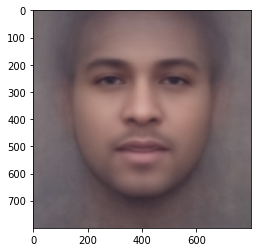

CPU times: user 58min 50s, sys: 3min 47s, total: 1h 2min 37s
Wall time: 1h 7min 36s


In [26]:
%%time
# Use  the detected landmarks to create an average face
fn = f"average_face_{folder.rsplit('/', 1)[-1]}.jpg"
average_face = facer.create_average_face(faces, landmarks, output_file=fn, save_image=True)

# View the composite image
plt.imshow(average_face)
plt.show()